In [1]:
%matplotlib inline

import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import random

# Chapter 3

## Easy

These problems use the samples from the posterior distribution for the globe tossing example. This code will give you a specific set of samples, so that you can check your answers exactly.

<Container object of 100 artists>

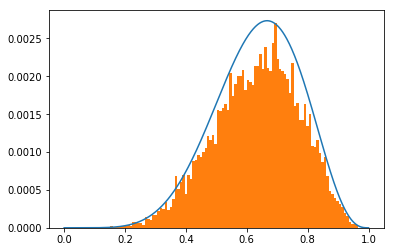

In [2]:
GRID_SIZE = 1000
BINS = 100

p_grid = np.linspace(start=0, stop=1, num=GRID_SIZE)
prior = np.ones(1000)
likelihood = scipy.stats.binom.pmf(k=6, n=9, p=p_grid)
posterior = likelihood * prior
posterior = posterior / np.sum(posterior)
random.seed(100)

def sample_observations_with_replacement(values, distribution, n):
    cumulative = np.cumsum(distribution)
    return np.array([values[np.where(cumulative >= random.random())[0][0]] for i in range(n)])
    
samples = sample_observations_with_replacement(p_grid, posterior, 10000)
fig, ax = plt.subplots()
ax.plot(p_grid, posterior)
results, edges = np.histogram(samples, bins=BINS, normed=True)
binWidth = edges[1] - edges[0]
ax.bar(edges[:-1], results*binWidth/(GRID_SIZE/float(BINS)), binWidth, color='#ff7f0e')

Use the values in *samples* to answer the questions that follow.

**3E1** How much posterior probability lies below p = 0.2?

In [3]:
np.sum(samples < 0.2)/float(len(samples))

0.001

**3E2** How much posterior probability lies above p = 0.8?

In [4]:
np.sum(samples > 0.8)/float(len(samples))

0.1234

**3E3** How much posterior probability lies between p = 0.2 and p = 0.8?

In [5]:
np.sum(np.logical_and(samples > 0.2, samples < 0.8))/float(len(samples))

0.87560000000000004

**3E4** 20% of the posterior probability lies below which value of p?

In [6]:
np.percentile(samples, 20)

0.51651651651651653

**3E5** 20% of the posterior probability lies above which value of p?

In [7]:
np.percentile(samples, 80)

0.75975975975975973

**3E6** Which values of p contain the narrowest interval equal to 66% of the posterior probability?

In [8]:
def highest_posterior_density_interval(samples, prob):
    grid = np.linspace(start=0, stop=100 - prob, num=10000)
    per_i = []
    per_j = []
    width = []
    for i in grid:
        per_i.append(np.percentile(samples, i))
        if i + prob <= 100:
            per_j.append(np.percentile(samples, i + prob))
            width.append(per_j[-1] - per_i[-1])
    i = np.argmin(width)
    print('[' + str(per_i[i]) + ', ' + str(per_j[i]) + '] - width = ' + str(width[i]))
    
highest_posterior_density_interval(samples, 66)

[0.506506506507, 0.77977977978] - width = 0.273273273273


**3E7** Which values of p contain 66% of the posterior probability, assuming equal posterior probability both below and above the interval?

In [9]:
prob = (100 - 66)/2.0
print('[' + str(np.percentile(samples, prob)) + ', ' + str(np.percentile(samples, 100-prob)) + ']')

[0.499499499499, 0.774774774775]
